# Goldsmiths University of London
# MSc Data Science and Artificial Intelligence
# Final Project in Data Science (2023-24)
# Supervisor: Dr V L Raju Chinthalapati
# Author: Alperen Unal - aunal001
# Student ID: 33804283

## Phase 6 (Final) - LSTM

## 1. Utilised Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error

## 2. Data Preprocessing

In [2]:
prediction_df = pd.read_csv("prediction_scaled_log_returns.csv")
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31339 entries, 0 to 31338
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   spot_btc_coin_volume                  31339 non-null  float64
 1   futures_btc_close_price               31339 non-null  float64
 2   futures_btc_coin_volume               31339 non-null  float64
 3   futures_btc_coin_open_interest_close  31339 non-null  float64
 4   futures_btc_funding_rate              31339 non-null  float64
 5   futures_btc_CVD                       31339 non-null  float64
 6   futures_eth_close_price               31339 non-null  float64
 7   futures_eth_coin_open_interest_close  31339 non-null  float64
 8   futures_eth_funding_rate              31339 non-null  float64
 9   futures_eth_CVD                       31339 non-null  float64
 10  eth_etf                               31339 non-null  int64  
 11  btc_etf        

In [3]:
df = prediction_df[['futures_btc_close_price', 'futures_btc_coin_volume',
                    'futures_btc_coin_open_interest_close', 'futures_btc_funding_rate',
                    'futures_btc_CVD', 'log_returns', 'volatility']]

In [4]:
gjr_df = pd.read_csv("predicted_log_returns_gjr.csv")
har_df = pd.read_csv("predicted__har_volatility.csv")

In [5]:
gjr_df

,Date,Predicted_log_returns,Actual_Volatility
0,2024-05-31 19:00:00,0.006146,0.003308
1,2024-05-31 20:00:00,0.006526,0.003287
2,2024-05-31 21:00:00,0.006293,0.003306
3,2024-05-31 22:00:00,0.006090,0.003301
4,2024-05-31 23:00:00,0.005887,0.003299
...,...,...,...
1435,2024-07-30 14:00:00,0.004156,0.004975
1436,2024-07-30 15:00:00,0.004714,0.005225
1437,2024-07-30 16:00:00,0.004712,0.003993
1438,2024-07-30 17:00:00,0.004545,0.004072


In [6]:

start_date = '2021-01-02 00:00:00'
end_date = '2024-07-30 18:00:00'
freq = 'H'  


datetime_index = pd.date_range(start=start_date, end=end_date, freq=freq)


df = df.set_index(datetime_index)

In [7]:
df

,futures_btc_close_price,futures_btc_coin_volume,futures_btc_coin_open_interest_close,futures_btc_funding_rate,futures_btc_CVD,log_returns,volatility
2021-01-02 00:00:00,29215.89,11380.580,36013.363,0.000100,-1.080364e+04,-0.004142,0.005182
2021-01-02 01:00:00,29380.00,7693.401,35530.754,0.000100,-1.072782e+04,0.005601,0.004329
2021-01-02 02:00:00,29347.02,6230.851,35781.508,0.000100,-1.051844e+04,-0.001123,0.004065
2021-01-02 03:00:00,29364.67,4118.911,35532.749,0.000100,-1.078220e+04,0.000601,0.004042
2021-01-02 04:00:00,29363.03,4267.183,35487.117,0.000100,-1.094671e+04,-0.000056,0.004012
...,...,...,...,...,...,...,...
2024-07-30 14:00:00,65779.40,23581.410,84405.692,0.000050,-1.856454e+06,-0.008747,0.004975
2024-07-30 15:00:00,66198.00,20218.770,83619.759,0.000077,-1.856047e+06,0.006344,0.005225
2024-07-30 16:00:00,66150.20,8097.586,83588.161,0.000092,-1.855806e+06,-0.000722,0.003993
2024-07-30 17:00:00,65839.80,15950.058,83142.319,0.000100,-1.856045e+06,-0.004703,0.004072


In [8]:

gjr_df = gjr_df.drop(columns=['Date'])


In [9]:

start_date = '2024-05-31 19:00:00'
end_date = '2024-07-30 18:00:00'
freq = 'H'  


datetime_index = pd.date_range(start=start_date, end=end_date, freq=freq)


gjr_df = gjr_df.set_index(datetime_index)

In [10]:
gjr_df

,Predicted_log_returns,Actual_Volatility
2024-05-31 19:00:00,0.006146,0.003308
2024-05-31 20:00:00,0.006526,0.003287
2024-05-31 21:00:00,0.006293,0.003306
2024-05-31 22:00:00,0.006090,0.003301
2024-05-31 23:00:00,0.005887,0.003299
...,...,...
2024-07-30 14:00:00,0.004156,0.004975
2024-07-30 15:00:00,0.004714,0.005225
2024-07-30 16:00:00,0.004712,0.003993
2024-07-30 17:00:00,0.004545,0.004072


In [11]:
gjr_df = gjr_df.drop(columns=['Actual_Volatility'])


In [12]:
gjr_df

,Predicted_log_returns
2024-05-31 19:00:00,0.006146
2024-05-31 20:00:00,0.006526
2024-05-31 21:00:00,0.006293
2024-05-31 22:00:00,0.006090
2024-05-31 23:00:00,0.005887
...,...
2024-07-30 14:00:00,0.004156
2024-07-30 15:00:00,0.004714
2024-07-30 16:00:00,0.004712
2024-07-30 17:00:00,0.004545


In [13]:
small_df = pd.concat([gjr_df, df], axis=1)

In [14]:
har_df

,Time,Actual,Predicted
0,2022-05-12 19:00:00,0.021572,0.015638
1,2022-05-12 20:00:00,0.020608,0.015904
2,2022-05-12 21:00:00,0.020118,0.015954
3,2022-05-12 22:00:00,0.020257,0.015812
4,2022-05-12 23:00:00,0.020240,0.015865
...,...,...,...
19195,2024-07-20 14:00:00,0.002807,0.005127
19196,2024-07-20 15:00:00,0.002878,0.004917
19197,2024-07-20 16:00:00,0.002293,0.005005
19198,2024-07-20 17:00:00,0.002724,0.004904


In [15]:

har_df = har_df.drop(columns=['Time'])


In [16]:

start_date = '2022-05-12 19:00:00'
end_date = '2024-07-20 18:00:00'
freq = 'H'  


datetime_index = pd.date_range(start=start_date, end=end_date, freq=freq)

har_df = har_df.set_index(datetime_index)

In [17]:
har_df = har_df.drop(columns=['Actual'])


In [18]:
har_df.rename(columns={'Predicted': 'har_vol_predictions'}, inplace=True)

In [19]:
har_df

,har_vol_predictions
2022-05-12 19:00:00,0.015638
2022-05-12 20:00:00,0.015904
2022-05-12 21:00:00,0.015954
2022-05-12 22:00:00,0.015812
2022-05-12 23:00:00,0.015865
...,...
2024-07-20 14:00:00,0.005127
2024-07-20 15:00:00,0.004917
2024-07-20 16:00:00,0.005005
2024-07-20 17:00:00,0.004904


In [20]:
small_df.rename(columns={'Predicted_log_returns': 'gjr_volatility'}, inplace=True)

In [21]:
lstm_df = pd.concat([har_df, small_df], axis=1)

In [22]:
lstm_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31339 entries, 2021-01-02 00:00:00 to 2024-07-30 18:00:00
Freq: H
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   har_vol_predictions                   19200 non-null  float64
 1   gjr_volatility                        1440 non-null   float64
 2   futures_btc_close_price               31339 non-null  float64
 3   futures_btc_coin_volume               31339 non-null  float64
 4   futures_btc_coin_open_interest_close  31339 non-null  float64
 5   futures_btc_funding_rate              31339 non-null  float64
 6   futures_btc_CVD                       31339 non-null  float64
 7   log_returns                           31339 non-null  float64
 8   volatility                            31339 non-null  float64
dtypes: float64(9)
memory usage: 2.4 MB


In [23]:
lstm_df = lstm_df.dropna()

In [24]:
lstm_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 2024-05-31 19:00:00 to 2024-07-20 18:00:00
Freq: H
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   har_vol_predictions                   1200 non-null   float64
 1   gjr_volatility                        1200 non-null   float64
 2   futures_btc_close_price               1200 non-null   float64
 3   futures_btc_coin_volume               1200 non-null   float64
 4   futures_btc_coin_open_interest_close  1200 non-null   float64
 5   futures_btc_funding_rate              1200 non-null   float64
 6   futures_btc_CVD                       1200 non-null   float64
 7   log_returns                           1200 non-null   float64
 8   volatility                            1200 non-null   float64
dtypes: float64(9)
memory usage: 93.8 KB


## 2. Model Creation with ReLU

In [26]:
lstm_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 2024-05-31 19:00:00 to 2024-07-20 18:00:00
Freq: H
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   har_vol_predictions                   1200 non-null   float64
 1   gjr_volatility                        1200 non-null   float64
 2   futures_btc_close_price               1200 non-null   float64
 3   futures_btc_coin_volume               1200 non-null   float64
 4   futures_btc_coin_open_interest_close  1200 non-null   float64
 5   futures_btc_funding_rate              1200 non-null   float64
 6   futures_btc_CVD                       1200 non-null   float64
 7   log_returns                           1200 non-null   float64
 8   volatility                            1200 non-null   float64
dtypes: float64(9)
memory usage: 93.8 KB


### 2.1. Data Preprocessing

In [25]:
# Selecting all numeric columns in lstm_df
numeric_columns = lstm_df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()

scaled_df = lstm_df.copy()  # Creating a copy to preserve the original DataFrame
scaled_df[numeric_columns] = scaler.fit_transform(lstm_df[numeric_columns])

scaled_df

,har_vol_predictions,gjr_volatility,futures_btc_close_price,futures_btc_coin_volume,futures_btc_coin_open_interest_close,futures_btc_funding_rate,futures_btc_CVD,log_returns,volatility
2024-05-31 19:00:00,0.435396,0.245434,0.773930,0.169744,0.167503,0.715267,0.943963,0.537196,0.248321
2024-05-31 20:00:00,0.431660,0.269970,0.775899,0.041554,0.160454,0.663031,0.948279,0.485403,0.246240
2024-05-31 21:00:00,0.427807,0.254946,0.767333,0.026500,0.156322,0.657260,0.946776,0.442950,0.248130
2024-05-31 22:00:00,0.426814,0.241825,0.763687,0.015585,0.151084,0.657260,0.944735,0.462754,0.247556
2024-05-31 23:00:00,0.397433,0.228748,0.765965,0.102433,0.147634,0.657260,0.941847,0.486670,0.247441
...,...,...,...,...,...,...,...,...,...
2024-07-20 14:00:00,0.508077,0.279269,0.708259,0.042185,0.473408,0.419294,0.234411,0.488123,0.198989
2024-07-20 15:00:00,0.468532,0.258783,0.722160,0.062342,0.457105,0.377798,0.238842,0.534344,0.205903
2024-07-20 16:00:00,0.485049,0.271212,0.721021,0.114760,0.438383,0.354481,0.246218,0.472823,0.148315
2024-07-20 17:00:00,0.466115,0.257716,0.754235,0.295857,0.468074,0.353881,0.261076,0.612552,0.190796


In [37]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]  # Only feature columns
        y = data[i+seq_length, -1]  # Target variable
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

The window size, defined as seq_length, determines the number of time steps included in each input sequence for the model. In this case, a window size of 60 means that each input sequence will consist of 60 consecutive time steps, allowing the model to capture temporal dependencies over this period.

In [38]:
selected_features = scaled_df[['log_returns', 'gjr_volatility', 'har_vol_predictions', 'futures_btc_funding_rate',
                               'volatility', 'futures_btc_coin_open_interest_close']]
target = scaled_df['futures_btc_close_price'].values

# Reuse the sequence creation function
seq_length = 60  # Window size
X_new_sequences, y_new_sequences = create_sequences(np.hstack((selected_features.values, target.reshape(-1, 1))), seq_length)

# Re-split into training, validation, and test sets in time order
train_size = int(len(X_new_sequences) * 0.6)
val_size = int(len(X_new_sequences) * 0.2)

X_train_new, X_val_new, X_test_new = X_new_sequences[:train_size], X_new_sequences[train_size:train_size + val_size], X_new_sequences[train_size + val_size:]
y_train_new, y_val_new, y_test_new = y_new_sequences[:train_size], y_new_sequences[train_size:train_size + val_size], y_new_sequences[train_size + val_size:]

### 2.2. Model Training and Predicting on Validation Set

2024-08-27 03:38:06.368854: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-27 03:38:06.369484: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-27 03:38:06.369835: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/35


2024-08-27 03:38:06.471960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-27 03:38:06.472718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-27 03:38:06.473249: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

22/22 [==============================] - 1s 14ms/step - loss: 0.1448 - mean_absolute_error: 0.3141 - val_loss: 0.2971 - val_mean_absolute_error: 0.5372
Epoch 2/35
19/22 [========================>.....] - ETA: 0s - loss: 0.0285 - mean_absolute_error: 0.1392

2024-08-27 03:38:07.152855: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-27 03:38:07.153506: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-27 03:38:07.153992: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

22/22 [==============================] - 0s 7ms/step - loss: 0.0274 - mean_absolute_error: 0.1359 - val_loss: 0.1357 - val_mean_absolute_error: 0.3573
Epoch 3/35
22/22 [==============================] - 0s 7ms/step - loss: 0.0152 - mean_absolute_error: 0.1005 - val_loss: 0.0670 - val_mean_absolute_error: 0.2495
Epoch 4/35
22/22 [==============================] - 0s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0540 - val_loss: 0.0129 - val_mean_absolute_error: 0.0971
Epoch 5/35
22/22 [==============================] - 0s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0315 - val_loss: 0.0120 - val_mean_absolute_error: 0.0987
Epoch 6/35
22/22 [==============================] - 0s 7ms/step - loss: 0.0012 - mean_absolute_error: 0.0260 - val_loss: 0.0096 - val_mean_absolute_error: 0.0878
Epoch 7/35
22/22 [==============================] - 0s 7ms/step - loss: 9.9724e-04 - mean_absolute_error: 0.0234 - val_loss: 0.0057 - val_mean_absolute_error: 0.0653
Epoch 8/35
22/22 [=================

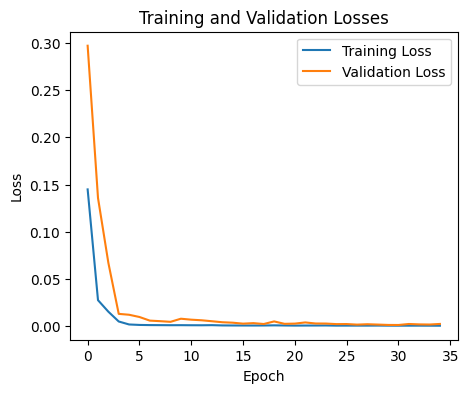

8/8 [==============================] - 0s 2ms/step


2024-08-27 03:38:12.779142: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-27 03:38:12.779569: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-27 03:38:12.780070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

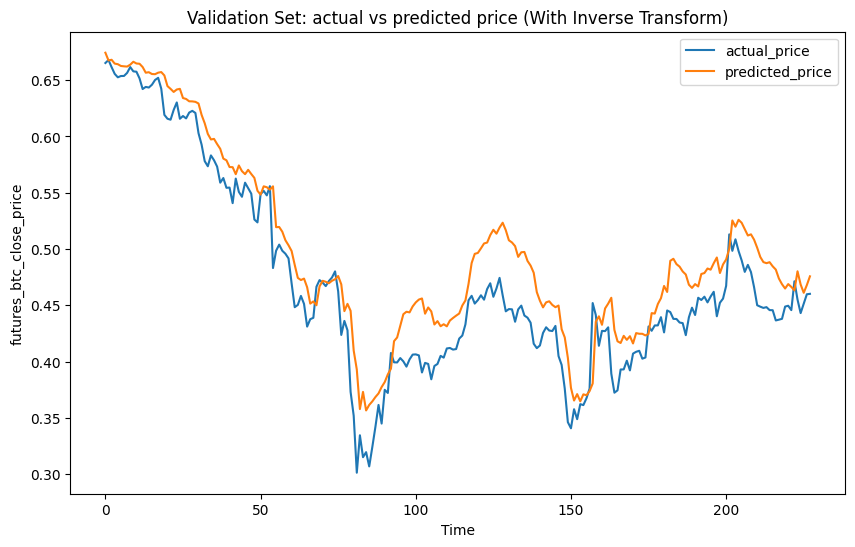

In [42]:
# Define the model
model_final = Sequential([
    layers.Input(shape=(X_train_new.shape[1], X_train_new.shape[2])),  # New input shape
    layers.LSTM(32),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),    
    layers.Dense(1)  # Output layer, single neuron (log_returns prediction)
])

# Compile the model
model_final.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

# Train the model
history = model_final.fit(X_train_new, y_train_new, validation_data=(X_val_new, y_val_new), epochs=35)

# Visualize the training and validation losses
plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the validation set
y_val_pred = model_final.predict(X_val_new)

# Rescale the predictions and actual values back to the original scale
y_val_pred_rescaled = target_scaler.inverse_transform(y_val_pred)
y_val_rescaled = target_scaler.inverse_transform(y_val_new.reshape(-1, 1))

# Plot the actual values (y_val_rescaled) vs. predicted values (y_val_pred_rescaled)
plt.figure(figsize=(10, 6))
plt.plot(y_val_rescaled, label='actual_price')
plt.plot(y_val_pred_rescaled, label='predicted_price')
plt.title('Validation Set: actual vs predicted price (With Inverse Transform)')
plt.xlabel('Time')
plt.ylabel('futures_btc_close_price')
plt.legend()
plt.show()


### 2.3. Model Testing on Test Set

8/8 [==============================] - 0s 2ms/step


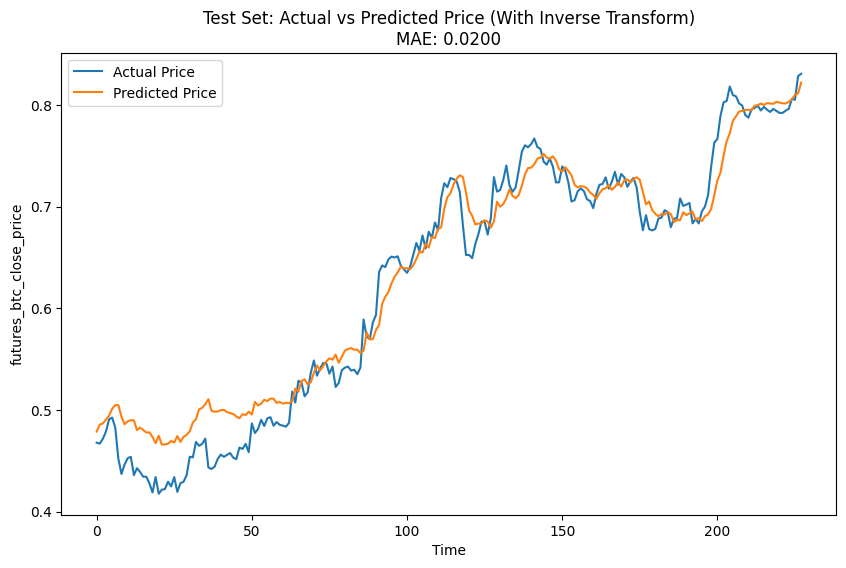

In [43]:
# Predictions on the test set
y_test_pred = model_final.predict(X_test_new)

# Rescaling the predictions and actual values back to the original scale
y_test_pred_rescaled = target_scaler.inverse_transform(y_test_pred)
y_test_rescaled = target_scaler.inverse_transform(y_test_new.reshape(-1, 1))

# Calculation of the Mean Absolute Error (MAE)
mae_value = mean_absolute_error(y_test_rescaled, y_test_pred_rescaled)

# The actual values (y_test_rescaled) vs. predicted values (y_test_pred_rescaled)
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual Price')
plt.plot(y_test_pred_rescaled, label='Predicted Price')
plt.title(f'Test Set: Actual vs Predicted Price (With Inverse Transform)\nMAE: {mae_value:.4f}')
plt.xlabel('Time')
plt.ylabel('futures_btc_close_price')
plt.legend()
plt.show()

### 2.4. Future Prediction (1-Hour)

1/1 [==============================] - 0s 10ms/step
Next Predicted Time: 2024-07-20 19:00:00
Next Predicted Price: 0.7451375722885132


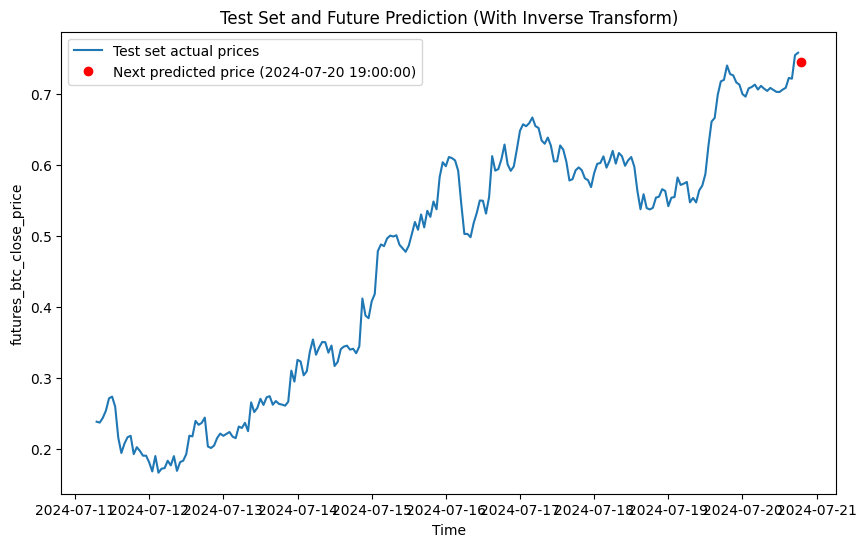

In [45]:
# Fit the scaler on the original futures_btc_close_price data
scaler = MinMaxScaler()
scaler.fit(scaled_df[['futures_btc_close_price']])

y_test_rescaled = scaler.inverse_transform(y_test_new.reshape(-1, 1))


# Using the last sequence from the test set for prediction
current_sequence = X_test_new[-1, :, :]

# Expanding dimensions to match the model input shape
current_sequence = np.expand_dims(current_sequence, axis=0)

# Prediction
next_pred = model_final.predict(current_sequence)

# Rescale the predicted price back to the original scale
next_pred_rescaled = scaler.inverse_transform(next_pred)


time_index = scaled_df.index[-len(y_test_new):]

# Define the next time point after the last one in time_index
next_time = time_index[-1] + (time_index[-1] - time_index[-2])


print(f"Next Predicted Time: {next_time}")
print(f"Next Predicted Price: {next_pred_rescaled[0][0]}")


plt.figure(figsize=(10, 6))
plt.plot(time_index, y_test_rescaled, label='Test set actual prices')
plt.plot([next_time], [next_pred_rescaled[0][0]], 'ro', label=f'Next predicted price ({next_time})')
plt.title('Test Set and Future Prediction (With Inverse Transform)')
plt.xlabel('Time')
plt.ylabel('futures_btc_close_price')
plt.legend()
plt.show()

### 2.5. Future Prediction (24-Hour)

1/1 [==============================] - 0s 8ms/step


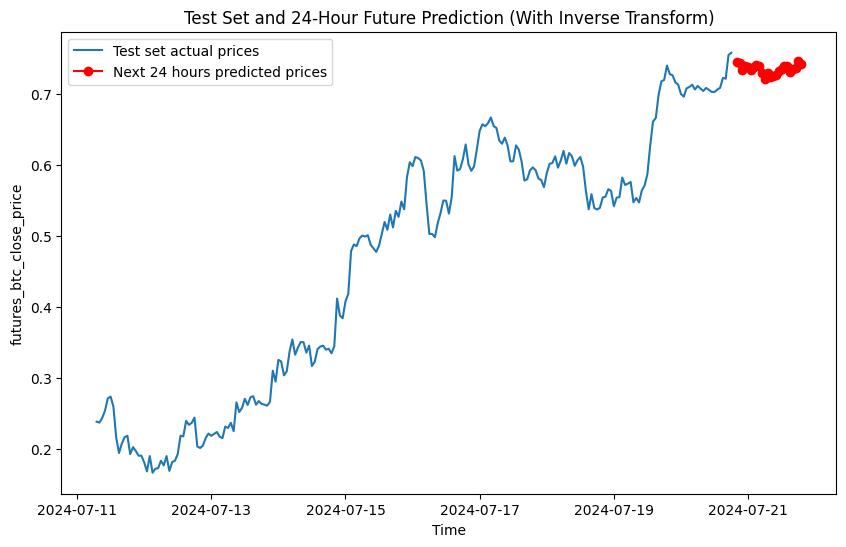

Predicted Time: 2024-07-20 20:00:00, Predicted Price: 0.7451375722885132
Predicted Time: 2024-07-20 21:00:00, Predicted Price: 0.7432016730308533
Predicted Time: 2024-07-20 22:00:00, Predicted Price: 0.7338308691978455
Predicted Time: 2024-07-20 23:00:00, Predicted Price: 0.7382688522338867
Predicted Time: 2024-07-21 00:00:00, Predicted Price: 0.7374193072319031
Predicted Time: 2024-07-21 01:00:00, Predicted Price: 0.733165442943573
Predicted Time: 2024-07-21 02:00:00, Predicted Price: 0.7376134991645813
Predicted Time: 2024-07-21 03:00:00, Predicted Price: 0.7406077980995178
Predicted Time: 2024-07-21 04:00:00, Predicted Price: 0.7394515872001648
Predicted Time: 2024-07-21 05:00:00, Predicted Price: 0.7289419770240784
Predicted Time: 2024-07-21 06:00:00, Predicted Price: 0.7203512787818909
Predicted Time: 2024-07-21 07:00:00, Predicted Price: 0.7292847037315369
Predicted Time: 2024-07-21 08:00:00, Predicted Price: 0.7241019606590271
Predicted Time: 2024-07-21 09:00:00, Predicted Price

In [46]:
# Making a 24-hour prediction using the last 60 data points (seq_length)
predictions = []
current_sequence = X_test_new[-1, :, :]  # The last sequence from the test set

for i in range(24):  # 24 iterations for 24-hour prediction
    if i == 0:
        current_sequence = np.expand_dims(current_sequence, axis=0)  # Reshaping to fit the model (1, 60, 7)
    
    next_pred = model_final.predict(current_sequence)
    next_pred_rescaled = scaler.inverse_transform(next_pred)
    predictions.append(next_pred_rescaled[0][0])

    # The newly predicted value by shifting in the current sequence
    current_sequence = np.roll(current_sequence, -1, axis=1)
    current_sequence[0, -1, -1] = next_pred[0, 0]  # The new prediction as the last value in the sequence

# Predicted times
future_times = [next_time + i * (time_index[-1] - time_index[-2]) for i in range(1, 25)]


plt.figure(figsize=(10, 6))
plt.plot(time_index, y_test_rescaled, label='Test set actual prices')
plt.plot(future_times, predictions, 'ro-', label='Next 24 hours predicted prices')
plt.title('Test Set and 24-Hour Future Prediction (With Inverse Transform)')
plt.xlabel('Time')
plt.ylabel('futures_btc_close_price')
plt.legend()
plt.show()

# Print the next 24-hour predictions
for i, (time, price) in enumerate(zip(future_times, predictions)):
    print(f"Predicted Time: {time}, Predicted Price: {price}")

## 3. Model Creation with Tanh

### 3.1. Model Training and Testing on Validation Set

2024-08-27 01:18:06.448944: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-27 01:18:06.449552: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-27 01:18:06.449904: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/35


2024-08-27 01:18:06.556120: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-27 01:18:06.556777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-27 01:18:06.557448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

22/22 [==============================] - 1s 14ms/step - loss: 0.0845 - mean_absolute_error: 0.2234 - val_loss: 0.0347 - val_mean_absolute_error: 0.1748
Epoch 2/35
18/22 [=======================>......] - ETA: 0s - loss: 0.0171 - mean_absolute_error: 0.1070

2024-08-27 01:18:07.239925: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-27 01:18:07.240471: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-27 01:18:07.241009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

22/22 [==============================] - 0s 7ms/step - loss: 0.0161 - mean_absolute_error: 0.1040 - val_loss: 0.0500 - val_mean_absolute_error: 0.2164
Epoch 3/35
22/22 [==============================] - 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0615 - val_loss: 0.0231 - val_mean_absolute_error: 0.1380
Epoch 4/35
22/22 [==============================] - 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0417 - val_loss: 0.0141 - val_mean_absolute_error: 0.1024
Epoch 5/35
22/22 [==============================] - 0s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0304 - val_loss: 0.0088 - val_mean_absolute_error: 0.0785
Epoch 6/35
22/22 [==============================] - 0s 7ms/step - loss: 0.0011 - mean_absolute_error: 0.0252 - val_loss: 0.0079 - val_mean_absolute_error: 0.0755
Epoch 7/35
22/22 [==============================] - 0s 7ms/step - loss: 9.2598e-04 - mean_absolute_error: 0.0227 - val_loss: 0.0058 - val_mean_absolute_error: 0.0625
Epoch 8/35
22/22 [=================

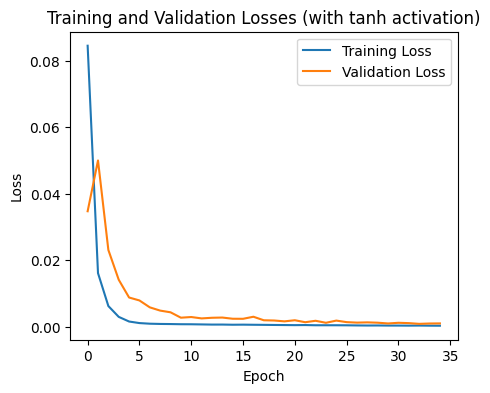

8/8 [==============================] - 0s 3ms/step


2024-08-27 01:18:13.198396: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-27 01:18:13.198894: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-27 01:18:13.199465: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

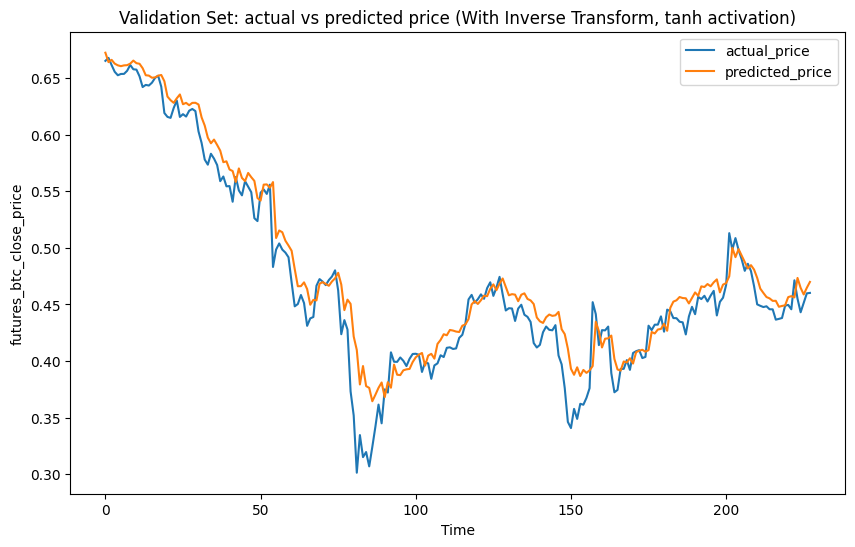

In [33]:
target_scaler = MinMaxScaler()
target_scaler.fit(y_train_new.reshape(-1, 1))

# Defining the model
model_final_tanh = Sequential([
    layers.Input(shape=(X_train_new.shape[1], X_train_new.shape[2])),  # New input shape
    layers.LSTM(32),
    layers.Dense(16, activation='tanh'),
    layers.Dense(16, activation='tanh'),    
    layers.Dense(1)  # Output layer, single neuron
])

# Compiling the model
model_final_tanh.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

# Training the model
history_tanh = model_final_tanh.fit(X_train_new, y_train_new, validation_data=(X_val_new, y_val_new), epochs=35)

# Visualising training and validation losses
plt.figure(figsize=(5, 4))
plt.plot(history_tanh.history['loss'], label='Training Loss')
plt.plot(history_tanh.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Losses (with tanh activation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predictions on the validation set
y_val_pred_tanh = model_final_tanh.predict(X_val_new)

# Transform the predictions and actual values to the original scale
y_val_pred_rescaled_tanh = target_scaler.inverse_transform(y_val_pred_tanh)
y_val_rescaled_tanh = target_scaler.inverse_transform(y_val_new.reshape(-1, 1))

# Compare the actual values (y_val_rescaled_tanh) with the predicted values (y_val_pred_rescaled_tanh)
plt.figure(figsize=(10, 6))
plt.plot(y_val_rescaled_tanh, label='actual_price')
plt.plot(y_val_pred_rescaled_tanh, label='predicted_price')
plt.title('Validation Set: actual vs predicted price (With Inverse Transform, tanh activation)')
plt.xlabel('Time')
plt.ylabel('futures_btc_close_price')
plt.legend()
plt.show()

### 3.2. Model Testing on Test Set

8/8 [==============================] - 0s 2ms/step


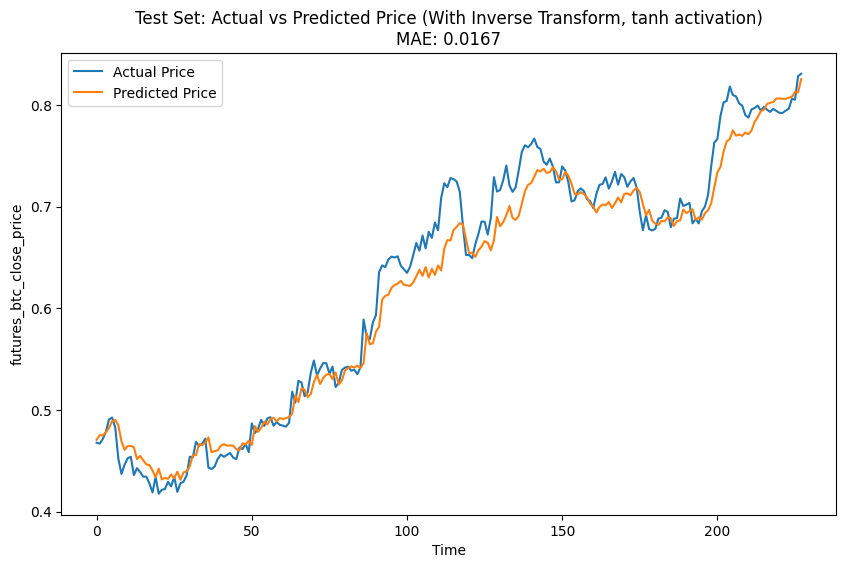

In [44]:
y_test_pred_tanh = model_final_tanh.predict(X_test_new)


y_test_pred_rescaled_tanh = target_scaler.inverse_transform(y_test_pred_tanh)
y_test_rescaled_tanh = target_scaler.inverse_transform(y_test_new.reshape(-1, 1))


mae_value_tanh = mean_absolute_error(y_test_rescaled_tanh, y_test_pred_rescaled_tanh)


plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled_tanh, label='Actual Price')
plt.plot(y_test_pred_rescaled_tanh, label='Predicted Price')
plt.title(f'Test Set: Actual vs Predicted Price (With Inverse Transform, tanh activation)\nMAE: {mae_value_tanh:.4f}')
plt.xlabel('Time')
plt.ylabel('futures_btc_close_price')
plt.legend()
plt.show()

### 3.3. Future Prediction (1-Hour)

1/1 [==============================] - 0s 11ms/step
Next Predicted Time: 2024-07-20 19:00:00
Next Predicted Price: 0.7500405311584473


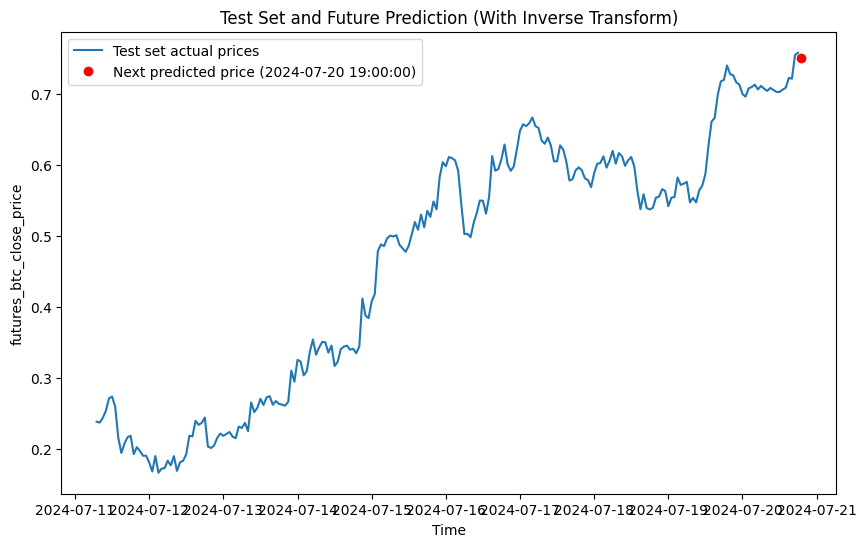

In [35]:
scaler = MinMaxScaler()
scaler.fit(scaled_df[['futures_btc_close_price']])


y_test_rescaled = scaler.inverse_transform(y_test_new.reshape(-1, 1))


current_sequence = X_test_new[-1, :, :]


current_sequence = np.expand_dims(current_sequence, axis=0)


next_pred = model_final_tanh.predict(current_sequence)


next_pred_rescaled = scaler.inverse_transform(next_pred)


time_index = scaled_df.index[-len(y_test_new):]


next_time = time_index[-1] + (time_index[-1] - time_index[-2])


print(f"Next Predicted Time: {next_time}")
print(f"Next Predicted Price: {next_pred_rescaled[0][0]}")


plt.figure(figsize=(10, 6))
plt.plot(time_index, y_test_rescaled, label='Test set actual prices')
plt.plot([next_time], [next_pred_rescaled[0][0]], 'ro', label=f'Next predicted price ({next_time})')
plt.title('Test Set and Future Prediction (With Inverse Transform)')
plt.xlabel('Time')
plt.ylabel('futures_btc_close_price')
plt.legend()
plt.show()

### 3.4. Future Prediction (24-Hour)

1/1 [==============================] - 0s 8ms/step


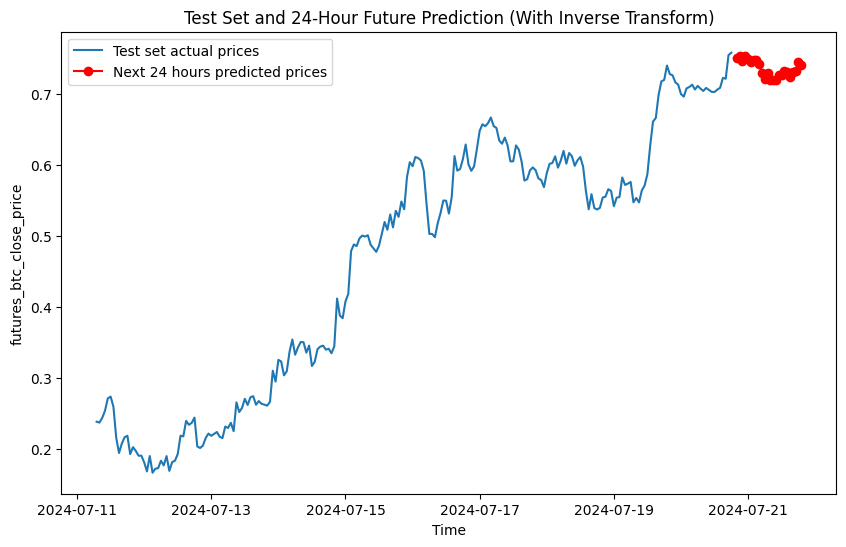

Predicted Time: 2024-07-20 20:00:00, Predicted Price: 0.7500405311584473
Predicted Time: 2024-07-20 21:00:00, Predicted Price: 0.7536616325378418
Predicted Time: 2024-07-20 22:00:00, Predicted Price: 0.7459492087364197
Predicted Time: 2024-07-20 23:00:00, Predicted Price: 0.7523126006126404
Predicted Time: 2024-07-21 00:00:00, Predicted Price: 0.7493999004364014
Predicted Time: 2024-07-21 01:00:00, Predicted Price: 0.7443753480911255
Predicted Time: 2024-07-21 02:00:00, Predicted Price: 0.7471126914024353
Predicted Time: 2024-07-21 03:00:00, Predicted Price: 0.7471944093704224
Predicted Time: 2024-07-21 04:00:00, Predicted Price: 0.7411944270133972
Predicted Time: 2024-07-21 05:00:00, Predicted Price: 0.7289228439331055
Predicted Time: 2024-07-21 06:00:00, Predicted Price: 0.7200600504875183
Predicted Time: 2024-07-21 07:00:00, Predicted Price: 0.7284408807754517
Predicted Time: 2024-07-21 08:00:00, Predicted Price: 0.7193359136581421
Predicted Time: 2024-07-21 09:00:00, Predicted Pric

In [36]:
scaler = MinMaxScaler()
scaler.fit(scaled_df[['futures_btc_close_price']])

y_test_rescaled = scaler.inverse_transform(y_test_new.reshape(-1, 1))

# The last 60 data points to make a 24-hour prediction
predictions = []
current_sequence = X_test_new[-1, :, :] 

for i in range(24):  # 24-hours prediction
    if i == 0:
        current_sequence = np.expand_dims(current_sequence, axis=0)  
    
    next_pred = model_final_tanh.predict(current_sequence)
    next_pred_rescaled = scaler.inverse_transform(next_pred)
    predictions.append(next_pred_rescaled[0][0])

    # The newly predicted value by shifting it into the current sequence
    current_sequence = np.roll(current_sequence, -1, axis=1)
    current_sequence[0, -1, -1] = next_pred[0, 0]  # The new prediction to the end of the sequence

# Predicted times
future_times = [next_time + i * (time_index[-1] - time_index[-2]) for i in range(1, 25)]

plt.figure(figsize=(10, 6))
plt.plot(time_index, y_test_rescaled, label='Test set actual prices')
plt.plot(future_times, predictions, 'ro-', label='Next 24 hours predicted prices')
plt.title('Test Set and 24-Hour Future Prediction (With Inverse Transform)')
plt.xlabel('Time')
plt.ylabel('futures_btc_close_price')
plt.legend()
plt.show()

# Print the predictions for the next 24 hours
for i, (time, price) in enumerate(zip(future_times, predictions)):
    print(f"Predicted Time: {time}, Predicted Price: {price}")

## 4. Conclusion

* ReLU Activation Model: The LSTM model with ReLU activation predicts a relatively stable future price with a slight upward trend in the 24-hour forecast. However, this model underestimates the fluctuations observed in the actual market data during the same period. The predicted prices by the ReLU model do not capture the sharp price increases and decreases evident in the real market movements.

* Tanh Activation Model: The LSTM model with Tanh activation provides predictions that follow the actual market’s trend more closely. The model predicts a slight decline followed by a stabilization, which is more aligned with the actual market behaviour shown in the real market price chart. The Tanh model appears to have a better capacity to anticipate minor fluctuations in the market, indicating a closer alignment with the actual price movements.

##### Comparison Between Predicted and Actual Market Values:

* ReLU Model vs. Actual Prices: The ReLU model’s prediction, as seen in, does not accurately capture the actual market dynamics between the two blue lines. The actual market prices within this period demonstrate more volatility and fluctuations than what the ReLU model predicted. This suggests that while ReLU can offer a general trend direction, it may struggle with capturing detailed price movements in volatile markets.

* Tanh Model vs. Actual Prices: The Tanh model’s predictions, shown in, align more closely with the actual price movements in the market. Although the Tanh model does not perfectly predict every minor fluctuation, its overall trend direction and slight variations are more representative of the actual price movements between the blue lines. This indicates that the Tanh model is more effective in predicting the detailed dynamics of the market over the short term.

##### Overall Assessment:
Comparing the two models and their predictions with the actual market data reveals that the LSTM model with Tanh activation outperforms the ReLU-based model in capturing the market's complexity and volatility during the predicted period. The Tanh model’s predictions are more aligned with the actual market prices, suggesting that Tanh is better suited for tasks requiring precise and nuanced forecasting in highly volatile markets.
